In [ ]:
# Import Libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

import librosa
import librosa.display
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')

# Connect Drive and Import Data

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Explore Audio File

# Understanding Audio
# y(sound): sequence of vibrations in varying pressure strengths (y)
# sr(sample rate): is the number of samples of audio carried per second, measured in Hz or kHz

y, sr = librosa.load('/content/drive/MyDrive/GTZAN /genres_original/blues/blues.00006.wav')
print('y:', y, '\n')
print('y shape:', np.shape(y), '\n')
print('Sample Rate (KHz):', sr, '\n')

y: [ 0.1822815   0.28302002  0.21020508 ... -0.22045898 -0.36273193
 -0.4295349 ] 

y shape: (661794,) 

Sample Rate (KHz): 22050 



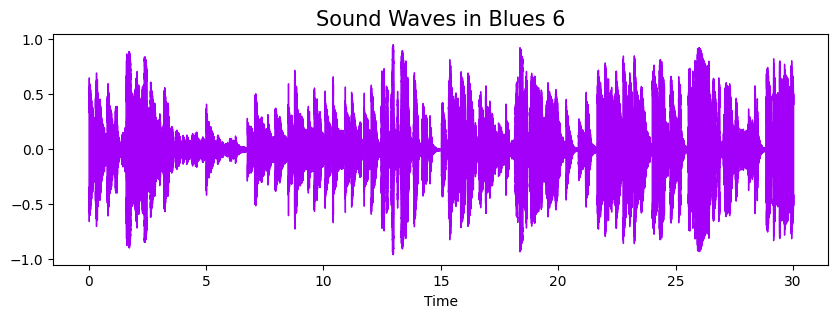

In [ ]:
# 2D Representation of Music
plt.figure(figsize = (10, 3))
librosa.display.waveshow(y = y, sr = sr, color = "#A300F9");
plt.title("Sound Waves in Blues 6", fontsize = 15);

Shape of D object: (1025, 1293)


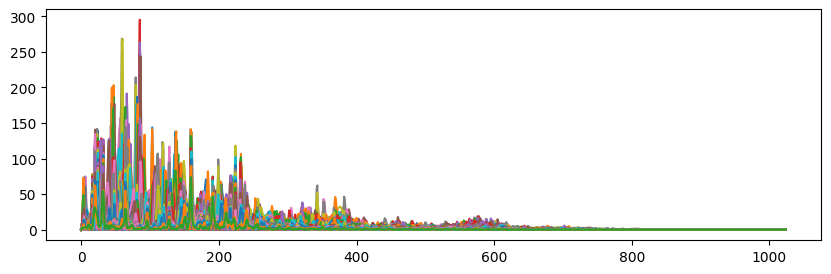

In [ ]:
# Fast Fourier Transform(FFT)
# Function that gets a signal in the time domain as input, and outputs its decomposition into frequencies
# Transform both the y-axis (frequency) to log scale, and the “color” axis (amplitude) to Decibels, which is approx. the log scale of amplitudes

# Default FFT window size
n_fft = 2048 # FFT window size
hop_length = 512 # number audio of frames between STFT columns (looks like a good default)

# Short-time Fourier transform (STFT)
D = np.abs(librosa.stft(y = y, n_fft = n_fft, hop_length = hop_length))

print('Shape of D object:', np.shape(D))

plt.figure(figsize = (10, 3))
plt.plot(D);

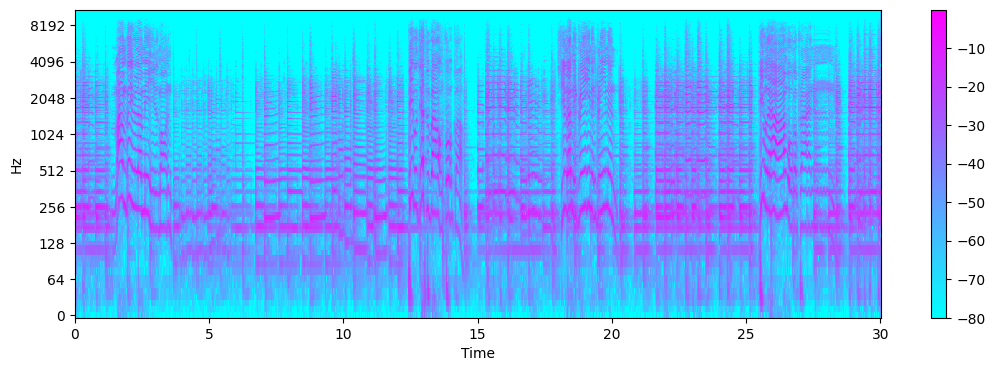

In [ ]:
# The Spectrogram
# What is a spectrogram? A spectrogram is a visual representation of the spectrum of frequencies of a signal as it varies with time.
# When applied to an audio signal, spectrograms are sometimes called sonographs, voiceprints, or voicegrams (wiki).
# Here we convert the frequency axis to a logarithmic one.

# Convert an amplitude spectrogram to Decibels-scaled spectrogram.
DB = librosa.amplitude_to_db(D, ref = np.max)

# Creating the Spectogram
plt.figure(figsize = (13, 4))
librosa.display.specshow(DB, sr = sr, hop_length = hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'cool')
plt.colorbar();

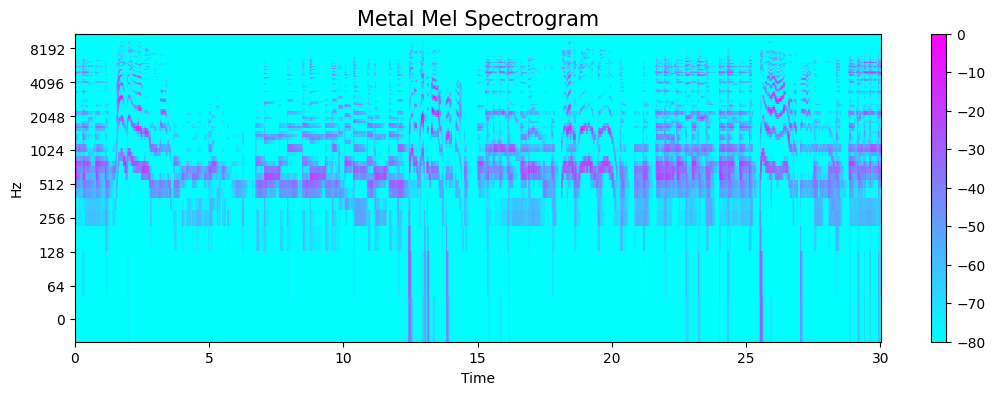

In [ ]:
# Mel Spectrogram
# The Mel Scale, mathematically speaking, is the result of some non-linear transformation of the frequency scale.
# The Mel Spectrogram is a normal Spectrogram, but with a Mel Scale on the y axis.

y, sr = librosa.load('/content/drive/MyDrive/GTZAN /genres_original/blues/blues.00006.wav')
y, _ = librosa.effects.trim(y)


S = librosa.feature.melspectrogram(y=y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize = (13, 4))
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'cool');
plt.colorbar();
plt.title("Metal Mel Spectrogram", fontsize = 15);

In [ ]:
# Explore Audio Feature
# Zero Crossing Rate: the rate at which the signal changes from positive to negative or back.
zero_crossings = librosa.zero_crossings(y, pad=False)
print(sum(zero_crossings))

48429


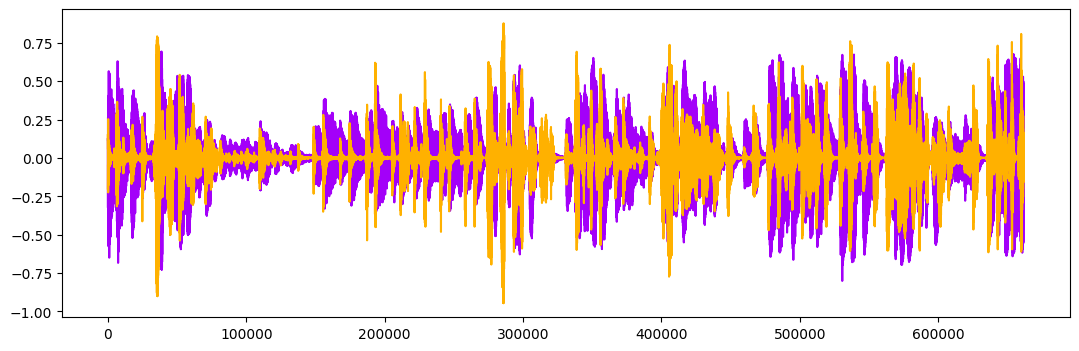

In [ ]:
# Harmonics and Perceptrual
# Harmonics are characteristichs that human years can't distinguish (represents the sound color)
# Perceptrual understanding shock wave represents the sound rhythm and emotion
y_harm, y_perc = librosa.effects.hpss(y)

plt.figure(figsize = (13, 4))
plt.plot(y_harm, color = '#A300F9');
plt.plot(y_perc, color = '#FFB100');

In [ ]:
# Tempo BMP (beats per minute): Dynamic programming beat tracker.
tempo, _ = librosa.beat.beat_track(y = y, sr = sr)
tempo

71.77734375

In [ ]:
# Spectral Centroid: Indicates where the ”centre of mass” for a sound is located
# and is calculated as the weighted mean of the frequencies present in the sound.
# Calculate the Spectral Centroids
spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)[0]

# Shape is a vector
print('Centroids:', spectral_centroids, '\n')
print('Shape of Spectral Centroids:', spectral_centroids.shape, '\n')

# Computing the time variable for visualization
frames = range(len(spectral_centroids))

# Converts frame counts to time (seconds)
t = librosa.frames_to_time(frames)

print('frames:', frames, '\n')
print('t:', t)

# Function that normalizes the Sound Data
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

Centroids: [1397.04336272 1244.33203006 1116.20929002 ... 1888.75782215 1932.02777076
 2035.90392061] 

Shape of Spectral Centroids: (1293,) 

frames: range(0, 1293) 

t: [0.00000000e+00 2.32199546e-02 4.64399093e-02 ... 2.99537415e+01
 2.99769615e+01 3.00001814e+01]


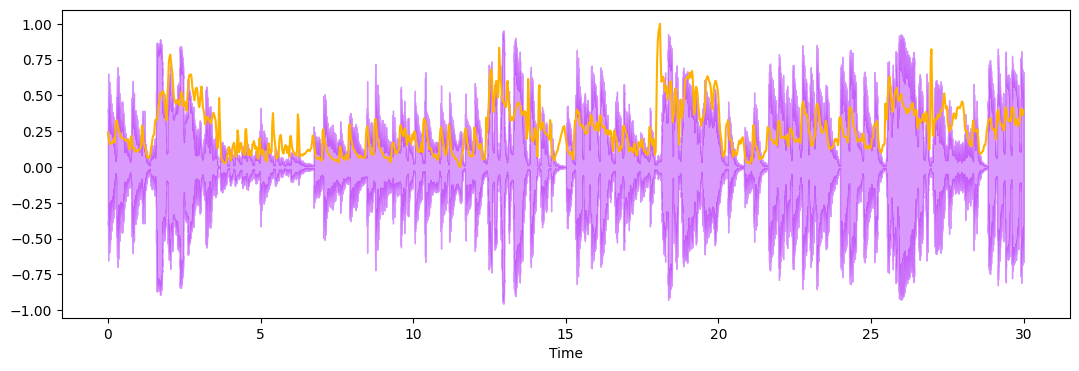

In [ ]:
#Plotting the Spectral Centroid along the waveform
plt.figure(figsize = (13, 4))
librosa.display.waveshow(y=y, sr=sr, alpha=0.4, color = '#A300F9');
plt.plot(t, normalize(spectral_centroids), color='#FFB100');

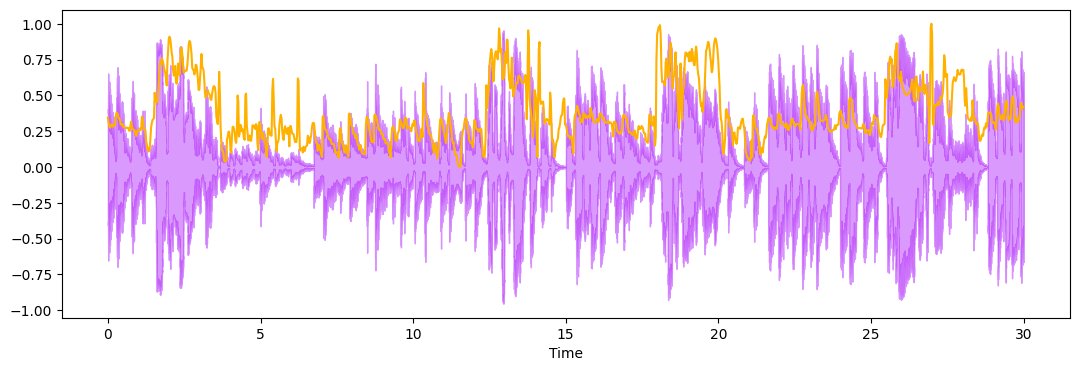

In [ ]:
# Spectral Rolloff: is a measure of the shape of the signal.
# It represents the frequency below which a specified percentage of the total spectral energy
spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)[0]

# The plot
plt.figure(figsize = (13, 4))
librosa.display.waveshow(y=y, sr=sr, alpha=0.4, color = '#A300F9');
plt.plot(t, normalize(spectral_rolloff), color='#FFB100');

In [ ]:
# EDA: Feature file contains the mean and variance for each audio file fo the features analysed above.
data = pd.read_csv('/content/drive/MyDrive/GTZAN /features_30_sec.csv')
data.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


from matplotlib import pyplot as plt
_df_0['chroma_stft_mean'].plot(kind='hist', bins=20, title='chroma_stft_mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['chroma_stft_var'].plot(kind='hist', bins=20, title='chroma_stft_var')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['rms_mean'].plot(kind='hist', bins=20, title='rms_mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['rms_var'].plot(kind='hist', bins=20, title='rms_var')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('filename').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='chroma_stft_mean', y='chroma_stft_var', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='chroma_stft_var', y='rms_mean', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='rms_mean', y='rms_var', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='rms_var', y='spectral_centroid_mean', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['length']
  ys = series['chroma_stft_mean']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('length', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('filename')):
  _plot_series(series, series_name, i)
  fig.legend(title='filename', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('length')
_ = plt.ylabel('chroma_stft_mean')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['length']
  ys = series['chroma_stft_var']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('length', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('filename')):
  _plot_series(series, series_name, i)
  fig.legend(title='filename', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('length')
_ = plt.ylabel('chroma_stft_var')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['length']
  ys = series['rms_mean']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('length', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('filename')):
  _plot_series(series, series_name, i)
  fig.legend(title='filename', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('length')
_ = plt.ylabel('rms_mean')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['length']
  ys = series['rms_var']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('length', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('filename')):
  _plot_series(series, series_name, i)
  fig.legend(title='filename', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('length')
_ = plt.ylabel('rms_var')

from matplotlib import pyplot as plt
_df_13['chroma_stft_mean'].plot(kind='line', figsize=(8, 4), title='chroma_stft_mean')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['chroma_stft_var'].plot(kind='line', figsize=(8, 4), title='chroma_stft_var')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['rms_mean'].plot(kind='line', figsize=(8, 4), title='rms_mean')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['rms_var'].plot(kind='line', figsize=(8, 4), title='rms_var')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['filename'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='chroma_stft_mean', y='filename', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['filename'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='chroma_stft_var', y='filename', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['filename'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='rms_mean', y='filename', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['filename'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='rms_var', y='filename', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/GTZAN /features_3_sec.csv')
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 9990 non-null   object 
 1   length                   9990 non-null   int64  
 2   chroma_stft_mean         9990 non-null   float64
 3   chroma_stft_var          9990 non-null   float64
 4   rms_mean                 9990 non-null   float64
 5   rms_var                  9990 non-null   float64
 6   spectral_centroid_mean   9990 non-null   float64
 7   spectral_centroid_var    9990 non-null   float64
 8   spectral_bandwidth_mean  9990 non-null   float64
 9   spectral_bandwidth_var   9990 non-null   float64
 10  rolloff_mean             9990 non-null   float64
 11  rolloff_var              9990 non-null   float64
 12  zero_crossing_rate_mean  9990 non-null   float64
 13  zero_crossing_rate_var   9990 non-null   float64
 14  harmony_mean            

In [ ]:
# Check if the data is balance
data['label'].value_counts()

blues        1000
jazz         1000
metal        1000
pop          1000
reggae       1000
disco         999
classical     998
hiphop        998
rock          998
country       997
Name: label, dtype: int64

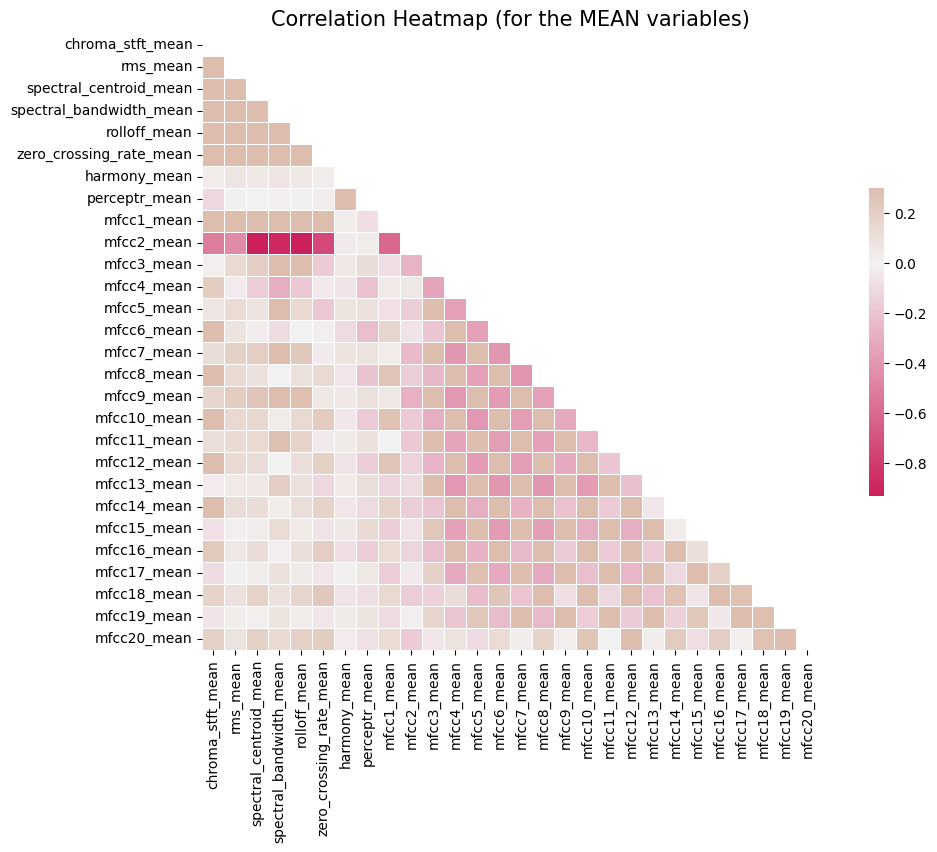

In [ ]:
# Draw correlation heatmap means
# Computing the Correlation Matrix
spike_cols = [col for col in data.columns if 'mean' in col]
corr = data[spike_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(13, 8));

# Generate a custom diverging colormap
cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap (for the MEAN variables)', fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);
plt.savefig("Corr Heatmap.jpg")

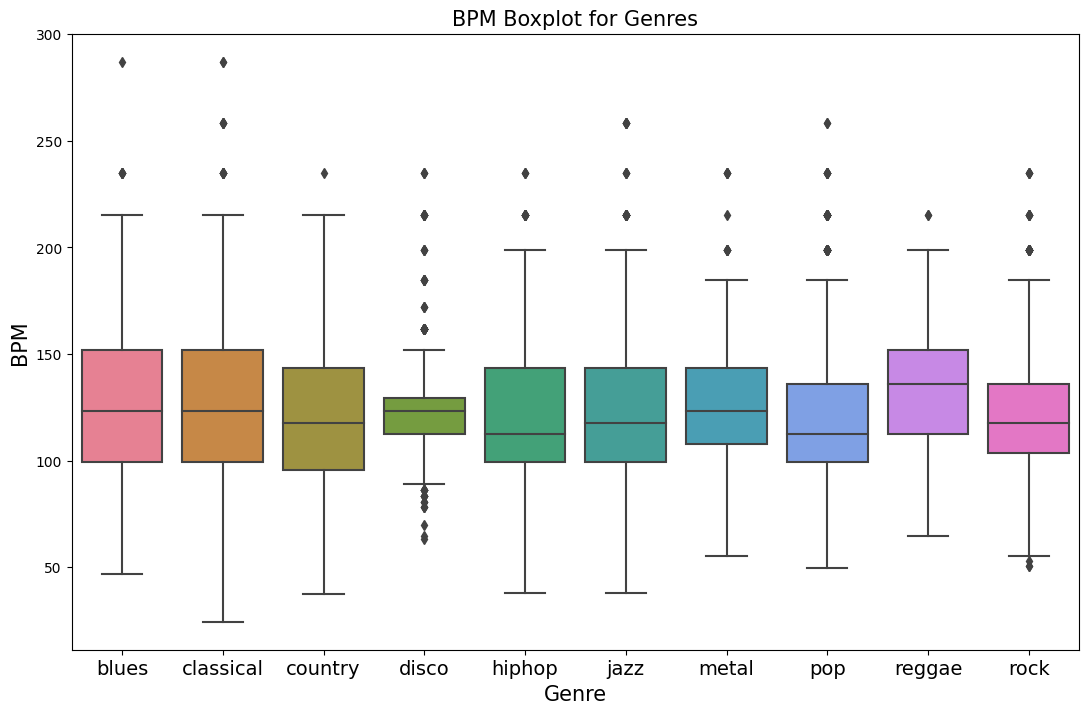

In [ ]:
# Box Plot for Genres Distributions
x = data[["label", "tempo"]]

f, ax = plt.subplots(figsize=(13, 8));
sns.boxplot(x = "label", y = "tempo", data = x, palette = 'husl');

plt.title('BPM Boxplot for Genres', fontsize = 15)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("BPM", fontsize = 15)
plt.savefig("BPM Boxplot.jpg")

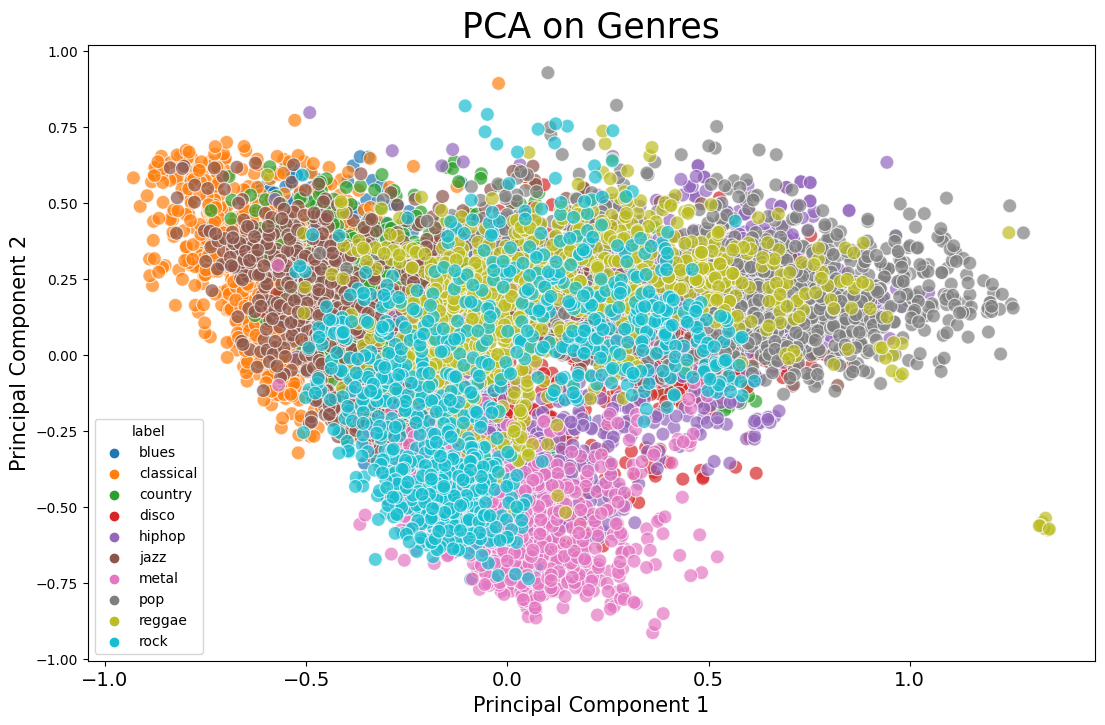

In [ ]:
# Principal Component Analysis - to visualize possible groups of genres¶
# Normalization
# PCA
# The Scatter Plot

from sklearn import preprocessing

data = data.iloc[0:, 1:]
y = data['label']
X = data.loc[:, data.columns != 'label']

#### NORMALIZE X ####
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)

#### PCA 2 COMPONENTS ####
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# concatenate with target label
finalDf = pd.concat([principalDf, y], axis = 1)

pca.explained_variance_ratio_

#### The Scatter Plot
plt.figure(figsize = (13, 8))
sns.scatterplot(x = "principal component 1", y = "principal component 2", data = finalDf, hue = "label", alpha = 0.7,
               s = 100);

plt.title('PCA on Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.savefig("PCA Scattert.jpg")

In [ ]:
# Build Model
# Import Libaries
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
import time

# Create dataset
y = data['label'] # genre variable.
X = data.loc[:, data.columns != 'label'] #select all columns but not the labels
# Normalize the data
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)

# new data frame with the new scaled data.
X = pd.DataFrame(np_scaled, columns = cols)
X.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.0,0.355399,0.716757,0.293133,0.107955,0.262173,0.034784,0.459205,0.094130,0.346153,...,0.363613,0.056198,0.397172,0.066062,0.371828,0.055344,0.380831,0.026797,0.506746,0.047781
1,0.0,0.367322,0.670347,0.253040,0.044447,0.270969,0.018716,0.470831,0.052261,0.363722,...,0.468596,0.092912,0.351681,0.074001,0.362068,0.076365,0.418452,0.082414,0.593029,0.065548
2,0.0,0.373159,0.728067,0.296753,0.141663,0.265293,0.023073,0.494051,0.059922,0.378215,...,0.479681,0.096704,0.420979,0.050639,0.400536,0.067509,0.433742,0.043841,0.546264,0.036062
3,0.0,0.399349,0.677066,0.298024,0.075042,0.238427,0.023187,0.455246,0.066234,0.329587,...,0.386258,0.067995,0.387474,0.050617,0.380430,0.050030,0.405824,0.041898,0.562204,0.034873
4,0.0,0.355668,0.689113,0.322308,0.052149,0.233460,0.016451,0.451651,0.047830,0.318453,...,0.438567,0.042500,0.460314,0.083860,0.388590,0.076524,0.409019,0.020763,0.517913,0.031713


In [ ]:
# Splitting the data into training and testing(70% - 30% split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Accuracy Function
def model_assess(model, title = "Default"):
    start_time = time.time()
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(confusion_matrix(y_test, preds))
    print('Accuracy', title, ':', round(accuracy_score(y_test, preds), 5), '\n')

# Calculate and display running time
    end_time = time.time()
    running_time = end_time - start_time
    print("Running Time for", title,":", round(running_time, 3), "seconds")

In [ ]:
# Test Different Models

# Stochastic Gradient Descent
sgd = SGDClassifier(max_iter=5000, random_state=0)
model_assess(sgd, "Stochastic Gradient Descent")

# KNN
knn = KNeighborsClassifier(n_neighbors=19)
model_assess(knn, "KNN")

# Decission trees
tree = DecisionTreeClassifier()
model_assess(tree, "Decission trees")

# Random Forest
rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
model_assess(rforest, "Random Forest")

# Logistic Regression
lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
model_assess(lg, "Logistic Regression")

# Neural Nets
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1)
model_assess(nn, "Neural Nets")

[[257   9   9   3   8  15  12   0   6   0]
 [  1 302   3   0   0   2   0   0   0   0]
 [ 51   7 150  12   7  29   0  13  13   4]
 [ 15  10  19 145  62   7   2  25  14   2]
 [ 15   5   8   2 237   0   6  15  21   2]
 [ 17  48   6   1   2 203   0   2   7   0]
 [ 32   1   5  13  12   0 231   0   5   4]
 [  1   2   7   4  19   4   0 221   7   2]
 [ 21   2  15   8  61   7   3   4 192   3]
 [ 76  13  30  46  25  29  11  14  30  26]]
Accuracy Stochastic Gradient Descent : 0.65532 

[[256   5  22   4   2   8   6   0  10   6]
 [  0 297   1   0   0  10   0   0   0   0]
 [  9   2 230  11   1  13   0   1  12   7]
 [  7   6   8 246   8   0   2   4   6  14]
 [  7   1  15  24 217   0   9  21  14   3]
 [  2  30  16   2   0 233   0   2   1   0]
 [  6   0   2  15   5   0 252   0   4  19]
 [  0   0   6  17   2   2   0 229  10   1]
 [  3   1  16  20  13   0   2  11 248   2]
 [ 11   1  20  35   0   7   7   2  10 207]]
Accuracy KNN : 0.80581 

[[178   2  31  14  13  17  15   9  18  22]
 [  4 262  10   1   0